In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Jury selection in Alameda County

This table was created with 1423 jurors.

In [2]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


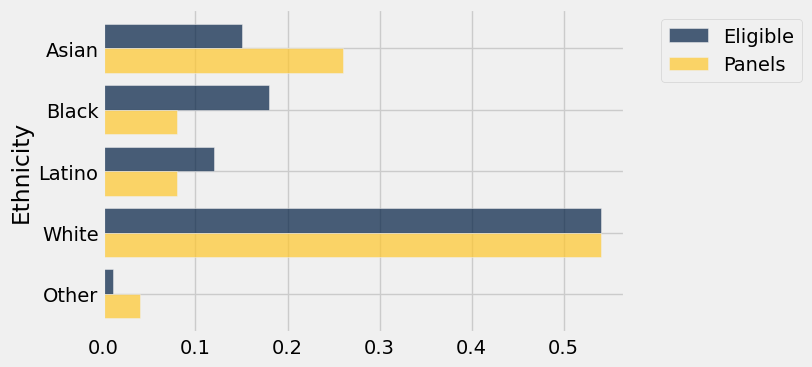

In [3]:
jury.barh('Ethnicity')

Below is the true distribution of people from which the 1423 jurors were randomly sampled.

In [4]:
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [5]:
simulated = sample_proportions(1423, model)
simulated

array([ 0.14827829,  0.1848208 ,  0.11665495,  0.54181307,  0.00843289])

In [6]:
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.148278
Black,0.18,0.08,0.184821
Latino,0.12,0.08,0.116655
White,0.54,0.54,0.541813
Other,0.01,0.04,0.00843289


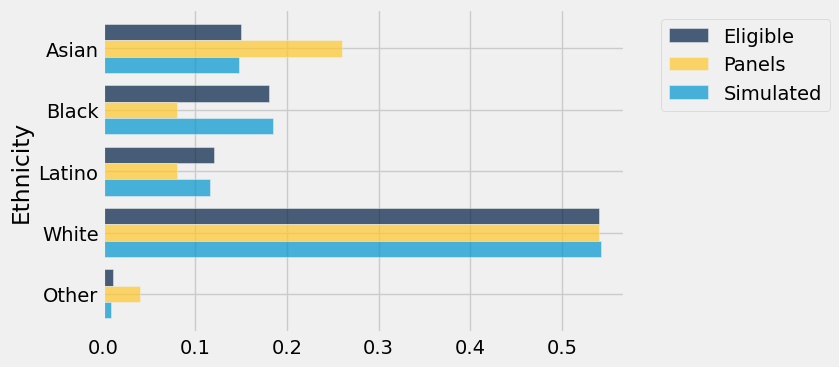

In [7]:
jury_with_simulated.barh('Ethnicity')

In [8]:
diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [9]:
sum(jury_with_difference.where('Difference', are.above(0)).column('Difference'))

0.14000000000000001

In [10]:
sum(abs(jury_with_difference.column('Difference')))/2

0.14000000000000001

### The Total Variation Distance (**TVD**)

In [11]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [12]:
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [13]:
simulated_tvd = tvd(sample_proportions(1423, model), jury.column('Eligible'))
simulated_tvd

0.017442023893183379

In [14]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

The observed TVD of 0.14 is nowhere close to the simulated TVDs!


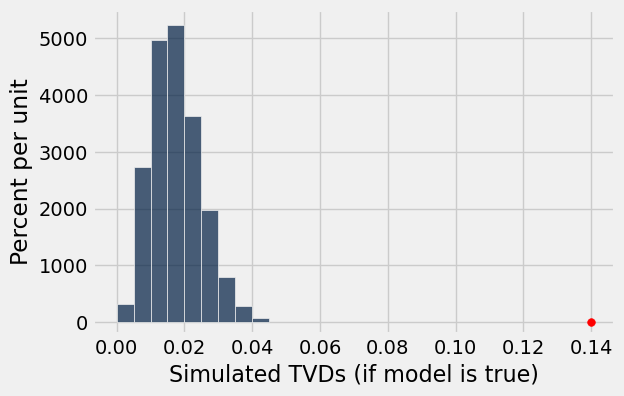

In [15]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('The observed TVD of ' + str(obsvd_tvd) + ' is nowhere close to the simulated TVDs!')

# Plotting details; ignore this code
plots.ylim(-2, 55)
plots.scatter(obsvd_tvd, 0, color='red', s=30);